In [1]:
#Caculate how many smart contract opcode in the folder and SSLOAD and SSTore
import os
from collections import Counter
import matplotlib.pyplot as plt 
import csv
from datetime import datetime

In [2]:
#Caculate number of smart contract opcode
count_sc = 0    
Name2Stat = {}
for filename in os.listdir('/Users/Gabriel/Desktop/opcode'):
    with open('/Users/Gabriel/Desktop/opcode/' + filename) as f:
        content = f.readlines()
        content = [x.strip() for x in content]
        counter = Counter(content)
        Name2Stat[filename] = [counter['SSTORE'], counter['SLOAD'], counter['BALANCE']]
        count_sc += 1

In [3]:
#Caculate specific number of each expensive/gas cost pattern for each smart contract
stat_S = sum([1 for x in Name2Stat.values() if x[0]!=0])
stat_L = sum([1 for x in Name2Stat.values() if x[1]!=0])
stat_B = sum([1 for x in Name2Stat.values() if x[2]!=0])
stat_SL = sum([1 for x in Name2Stat.values() if (x[0]!=0 and x[1]!=0)])
stat_SB = sum([1 for x in Name2Stat.values() if (x[0]!=0 and x[2]!=0)])
stat_LB = sum([1 for x in Name2Stat.values() if (x[1]!=0 and x[2]!=0)])
stat_SLB = sum([1 for x in Name2Stat.values() if (x[0]!=0 and x[1]!=0 and x[2]!=0)])

In [4]:
# Put all these pattern in a List "num_list".
num_list = [stat_S,stat_L,stat_B,stat_SL,stat_SB,stat_LB,stat_SLB]
print(num_list)

[15795, 16286, 3698, 15792, 3538, 3648, 3536]


In [5]:
# Dictionay dict conclude all expensive pattern and assign it to a number_dict
dict = {'S':stat_S/count_sc, 'L': stat_L/count_sc, 'B': stat_B/count_sc,'S&L': stat_SL/count_sc, 'S&B': stat_SB/count_sc,'L&B': stat_LB/count_sc,'S&L&B': stat_SLB/count_sc}
number_dict = dict
number_dict

{'B': 0.22273083177738962,
 'L': 0.9809070649882551,
 'L&B': 0.21971932783231946,
 'S': 0.9513340962476661,
 'S&B': 0.2130940191531651,
 'S&L': 0.9511534060109619,
 'S&L&B': 0.21297355899536227}

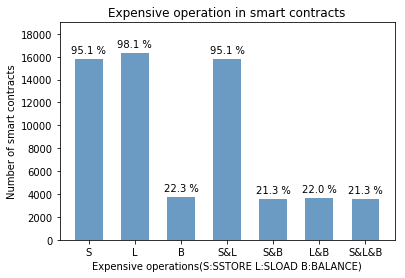

In [6]:
# Plot all expensive operations in smart contracts
plt.title('Expensive operation in smart contracts')
plt.xlabel('Expensive operations(S:SSTORE L:SLOAD B:BALANCE)')
plt.ylabel('Number of smart contracts')
plt.xticks(range(7),['S','L','B','S&L','S&B','L&B','S&L&B'])
plt.ylim([0,19000])
plt.yticks([0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000])
for x,y in enumerate(num_list):
    plt.text(x,y-500,'%0.1f %%\n' %(y/count_sc*100),ha='center')
plt.bar(range(7),num_list , align = 'center',color='steelblue', width = 0.6, alpha = 0.8) 
plt.show()  

In [7]:
#Import date of all smart contracts
with open('/Users/Gabriel/Desktop/contract_info_1.csv', mode='r') as infile:
    reader = csv.reader(infile)
    date_dict = {rows[0]:rows[4] for rows in reader}

In [58]:
#Combine Num2Stat(Opcode) and date_dict(with date) in a new Dictionary withDate_dict.
withDate_dict = {}
for adr in date_dict:
    if adr == 'Address':continue
    if adr not in Name2Stat:continue
    withDate_dict[adr] = Name2Stat[adr]+ [date_dict[adr]] 

In [59]:
withDate_dict

{'0x278a7b0a90f41a660765694c4c20af2bd09f45f1': [7, 24, 0, '3/1/2018'],
 '0xefdbec62ad88e50c872b027489b47be1d906fdd6': [7, 24, 0, '3/1/2018'],
 '0x80d0cb118f7179c08157c86f8ed416581278bb6a': [11, 33, 0, '3/1/2018'],
 '0xd8e64769bb02136564737a4ecc712083b473db86': [9, 14, 0, '3/1/2018'],
 '0xa3114b268ff4327525fbc0dd5c48e0b4304d07b9': [10, 37, 0, '3/1/2018'],
 '0x6f2211b4ac81da3d3e3ffd523867155cc5fcfaca': [7, 24, 0, '3/1/2018'],
 '0xb1dda9da790e6e8a644698d56f720709bae681e9': [17, 39, 2, '3/1/2018'],
 '0xae5c3ab8ed2a79edd8790ea1b6cdef9992ffa452': [10, 31, 0, '3/1/2018'],
 '0xde305be24cd8089d02ffdb82422d767907634f0f': [15, 44, 1, '3/1/2018'],
 '0x00765eaabedbc0ec71e922178b5cf6f5632ec324': [6, 18, 0, '3/1/2018'],
 '0x9d5fe0ebb989bec0249fab6d85cab0b931b42fb4': [9, 31, 0, '3/1/2018'],
 '0xa42868496e6b98d655e4a820801d8df8f4abe2b3': [9, 39, 0, '3/1/2018'],
 '0xd9e7d9a56ee6a4035ee8a9624c96eca1e4440671': [5, 37, 2, '3/1/2018'],
 '0xfedae5642668f8636a11987ff386bfd215f942ee': [13, 33, 0, '3/1/2018'],


In [79]:
withDate_dict['0x7371b37a352903bc62cf8a26e8509fd5a3bab98d'][-1]

'1/21/2018'

In [80]:
for date in withDate_dict:
    min_date = datetime.strptime('4/05/2016', '%m/%d/%Y')
    date_new = datetime.strptime(withDate_dict[date][-1], '%m/%d/%Y')
    days = (date_new - min_date).days
    withDate_dict[date][-1] = days


In [81]:
withDate_dict

{'0x278a7b0a90f41a660765694c4c20af2bd09f45f1': [7, 24, 0, 695],
 '0xefdbec62ad88e50c872b027489b47be1d906fdd6': [7, 24, 0, 695],
 '0x80d0cb118f7179c08157c86f8ed416581278bb6a': [11, 33, 0, 695],
 '0xd8e64769bb02136564737a4ecc712083b473db86': [9, 14, 0, 695],
 '0xa3114b268ff4327525fbc0dd5c48e0b4304d07b9': [10, 37, 0, 695],
 '0x6f2211b4ac81da3d3e3ffd523867155cc5fcfaca': [7, 24, 0, 695],
 '0xb1dda9da790e6e8a644698d56f720709bae681e9': [17, 39, 2, 695],
 '0xae5c3ab8ed2a79edd8790ea1b6cdef9992ffa452': [10, 31, 0, 695],
 '0xde305be24cd8089d02ffdb82422d767907634f0f': [15, 44, 1, 695],
 '0x00765eaabedbc0ec71e922178b5cf6f5632ec324': [6, 18, 0, 695],
 '0x9d5fe0ebb989bec0249fab6d85cab0b931b42fb4': [9, 31, 0, 695],
 '0xa42868496e6b98d655e4a820801d8df8f4abe2b3': [9, 39, 0, 695],
 '0xd9e7d9a56ee6a4035ee8a9624c96eca1e4440671': [5, 37, 2, 695],
 '0xfedae5642668f8636a11987ff386bfd215f942ee': [13, 33, 0, 695],
 '0xea35ee1c5be37333fa5c254b67e4957bdc4ff844': [13, 43, 0, 695],
 '0xb0c81081e1e0ad9a4382365e9cc8e

In [83]:
maxBA = {}
for key in withDate_dict:
          if withDate_dict[key][-1] == 656:
            if withDate_dict[key][2] != 0:
                maxBA[key] =  withDate_dict[key][2]

In [84]:
maxBA

{'0x06Cd2eEF7497911037ed631CAe1ecb307B4D4de1': 1,
 '0x0e752b742f744fdc2d93774da44c37b72c3e6952': 1,
 '0x2fabe69843e9a74a35b89145cb52e5568986c7a1': 171,
 '0x4ba72f0f8dad13709ee28a992869e79d0fe47030': 1,
 '0x99287f6a84d56fc3bb2ad95a4bbe783403f825f0': 3,
 '0xa3c230e94d733b2f96503c9452c95cf9e74910e0': 5,
 '0xb67b88a25708a35ae7c2d736d398d268ce4f7f83': 2,
 '0xe171783da2c451186b4256727481fa30203fef86': 1}

In [85]:
for filename in os.listdir('/Users/Gabriel/Desktop/opcode'):
    with open('/Users/Gabriel/Desktop/opcode/0x2fabe69843e9a74a35b89145cb52e5568986c7a1' ) as f:
        content = f.readlines()
        content = [x.strip() for x in content]

In [86]:
content

['PUSH1 0x60',
 'PUSH1 0x40',
 'MSTORE',
 'PUSH1 0x00',
 'CALLDATALOAD',
 'PUSH29 0x0100000000000000000000000000000000000000000000000000000000',
 'SWAP1',
 'DIV',
 'PUSH4 0xffffffff',
 'AND',
 'DUP1',
 'PUSH4 0x57de26a4',
 'EQ',
 'PUSH2 0x003b',
 'JUMPI',
 'JUMPDEST',
 "'fe'(Unknown Opcode)",
 'JUMPDEST',
 'CALLVALUE',
 'ISZERO',
 'PUSH2 0x0043',
 'JUMPI',
 "'fe'(Unknown Opcode)",
 'JUMPDEST',
 'PUSH2 0x004b',
 'PUSH2 0x00d4',
 'JUMP',
 'JUMPDEST',
 'PUSH1 0x40',
 'MLOAD',
 'DUP1',
 'DUP1',
 'PUSH1 0x20',
 'ADD',
 'DUP3',
 'DUP2',
 'SUB',
 'DUP3',
 'MSTORE',
 'DUP4',
 'DUP2',
 'DUP2',
 'MLOAD',
 'DUP2',
 'MSTORE',
 'PUSH1 0x20',
 'ADD',
 'SWAP2',
 'POP',
 'DUP1',
 'MLOAD',
 'SWAP1',
 'PUSH1 0x20',
 'ADD',
 'SWAP1',
 'DUP1',
 'DUP4',
 'DUP4',
 'PUSH1 0x00',
 'DUP4',
 'EQ',
 'PUSH2 0x009a',
 'JUMPI',
 'JUMPDEST',
 'DUP1',
 'MLOAD',
 'DUP3',
 'MSTORE',
 'PUSH1 0x20',
 'DUP4',
 'GT',
 'ISZERO',
 'PUSH2 0x009a',
 'JUMPI',
 'PUSH1 0x20',
 'DUP3',
 'ADD',
 'SWAP2',
 'POP',
 'PUSH1 0x20',
 'DU

In [12]:
#Caculate specific number of each expensive/gas cost pattern for each smart contract
statW_S = sum([1 for x in withDate_dict.values() if x[0]!=0])
statW_L = sum([1 for x in withDate_dict.values() if x[1]!=0])
statW_B = sum([1 for x in withDate_dict.values() if x[2]!=0])
statW_SL = sum([1 for x in withDate_dict.values() if (x[0]!=0 and x[1]!=0)])
statW_SB = sum([1 for x in withDate_dict.values() if (x[0]!=0 and x[2]!=0)])
statW_LB = sum([1 for x in withDate_dict.values() if (x[1]!=0 and x[2]!=0)])
statW_SLB = sum([1 for x in withDate_dict.values() if (x[0]!=0 and x[1]!=0 and x[2]!=0)])

In [13]:
numW_list= [statW_S,statW_L,statW_B,statW_SL,statW_SB,statW_LB,statW_SLB]
numW_list

[15795, 16286, 3698, 15792, 3538, 3648, 3536]

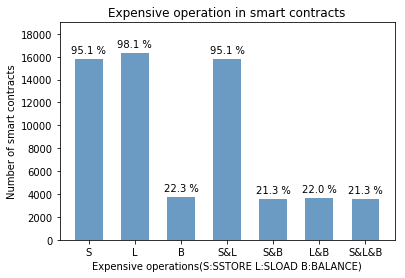

In [14]:
# Plot all expensive operations in smart contracts with withDate_dict
plt.title('Expensive operation in smart contracts')
plt.xlabel('Expensive operations(S:SSTORE L:SLOAD B:BALANCE)')
plt.ylabel('Number of smart contracts')
plt.xticks(range(7),['S','L','B','S&L','S&B','L&B','S&L&B'])
plt.ylim([0,19000])
plt.yticks([0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000])
for x,y in enumerate(numW_list):
    plt.text(x,y-500,'%0.1f %%\n' %(y/count_sc*100),ha='center')
plt.bar(range(7),num_list , align = 'center',color='steelblue', width = 0.6, alpha = 0.8) 
plt.show()  

In [15]:
#Caculate how many smart contracts created per day
time2SCSD = {}
for address in withDate_dict:
    time = withDate_dict[address][-1]
    if time in time2SCSD:
        time2SCSD[time] += 1
    else:
        time2SCSD[time] = 1

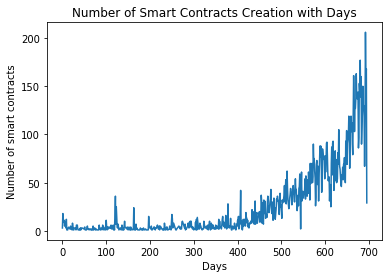

In [16]:
# Plot smart contracts created per day
lists = sorted(time2SCSD.items())
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.title('Number of Smart Contracts Creation with Days')
plt.xlabel('Days')
plt.ylabel('Number of smart contracts')
plt.plot(x, y)
plt.show()

In [17]:
# Caculate how many smart contracts created with SSTORE per day
time2SST = {}
for address in withDate_dict:
    st_time = withDate_dict[address][-1]
    timeSST = withDate_dict[address][0]
    if timeSST != 0:
        if st_time in time2SST :
            time2SST [st_time] += 1
        else:
            time2SST [st_time] = 1

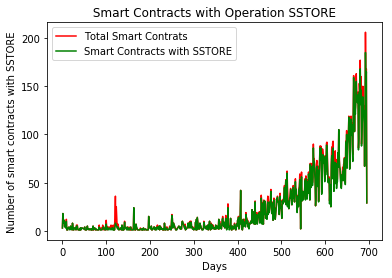

In [18]:
# Plot how many smart contracts created with SSTORE per day
lists_SST = sorted(time2SST.items())
x, y = zip(*lists_SST) # unpack a list of pairs into two tuples
plt.title(' Smart Contracts with Operation SSTORE ')
plt.xlabel('Days')
plt.ylabel('Number of smart contracts with SSTORE')
x1, y1 = zip(*lists)
plt.plot(x1, y1, color='red', label='Total Smart Contrats')
plt.plot(x, y,  color='Green', label='Smart Contracts with SSTORE')
plt.legend()
plt.show()

In [19]:
# Caculate how many smart contracts created with SLOAD per day
time2SSL = {}
for address in withDate_dict:
    sl_time = withDate_dict[address][-1]
    timeSL = withDate_dict[address][1]
    if timeSL != 0:
        if sl_time in time2SSL:
            time2SSL[sl_time] += 1
        else:
            time2SSL[sl_time] = 1

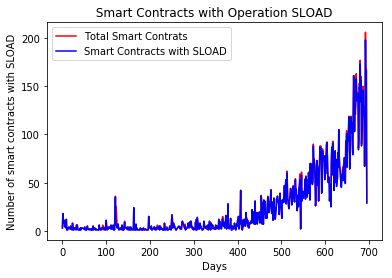

In [20]:
# Plot how many smart contracts created with SLOAD per day
lists_SSL = sorted(time2SSL.items())
x, y = zip(*lists_SSL) # unpack a list of pairs into two tuples
plt.title(' Smart Contracts with Operation SLOAD ')
plt.xlabel('Days')
plt.ylabel('Number of smart contracts with SLOAD')
x1, y1 = zip(*lists)
plt.plot(x1, y1, color='red', label='Total Smart Contrats')
plt.plot(x, y,  color='blue', label='Smart Contracts with SLOAD')
plt.legend()
plt.show()

In [21]:
# Caculate how many smart contracts created with BALANCE per day
time2BA = {}
for address in withDate_dict:
    b_time = withDate_dict[address][-1]
    timeBA = withDate_dict[address][2]
    if timeBA != 0:
        if b_time in time2BA:
            time2BA[b_time] += 1
        else:
            time2BA[b_time] = 1

In [44]:
time2BA

{0: 1,
 1: 13,
 2: 1,
 3: 1,
 4: 3,
 5: 2,
 6: 5,
 7: 2,
 9: 11,
 15: 1,
 16: 2,
 18: 2,
 19: 2,
 21: 1,
 22: 1,
 23: 5,
 26: 1,
 27: 1,
 30: 2,
 32: 3,
 33: 6,
 34: 4,
 35: 1,
 38: 1,
 41: 3,
 42: 1,
 43: 1,
 45: 2,
 49: 1,
 51: 2,
 53: 1,
 57: 4,
 59: 1,
 61: 1,
 62: 1,
 63: 2,
 64: 1,
 67: 1,
 68: 1,
 70: 5,
 72: 2,
 73: 2,
 74: 2,
 77: 2,
 79: 1,
 83: 1,
 84: 2,
 86: 2,
 87: 1,
 90: 1,
 92: 1,
 94: 1,
 99: 5,
 100: 10,
 101: 2,
 103: 4,
 104: 2,
 105: 2,
 108: 2,
 110: 2,
 113: 1,
 121: 26,
 122: 5,
 123: 25,
 125: 1,
 126: 3,
 127: 5,
 128: 3,
 129: 1,
 135: 2,
 136: 2,
 137: 1,
 138: 1,
 139: 3,
 140: 1,
 142: 2,
 143: 3,
 147: 1,
 148: 2,
 150: 1,
 153: 2,
 155: 1,
 156: 2,
 162: 2,
 164: 4,
 166: 1,
 168: 1,
 169: 1,
 170: 1,
 178: 1,
 179: 1,
 180: 1,
 182: 1,
 184: 1,
 185: 2,
 190: 1,
 197: 5,
 198: 1,
 203: 4,
 205: 1,
 206: 1,
 207: 1,
 209: 1,
 217: 1,
 218: 2,
 219: 1,
 220: 1,
 221: 5,
 225: 1,
 233: 1,
 234: 3,
 235: 1,
 236: 1,
 237: 2,
 239: 1,
 241: 1,
 245: 1,
 246

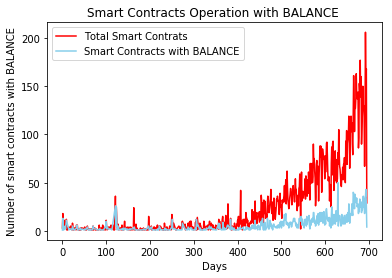

In [22]:
# Plot how many smart contracts created with SSTORE per day
lists_BA = sorted(time2BA.items())
x, y = zip(*lists_BA) # unpack a list of pairs into two tuples
x1, y1 = zip(*lists)
plt.title('Smart Contracts Operation with BALANCE ')
plt.xlabel('Days')
plt.ylabel('Number of smart contracts with BALANCE')
plt.plot(x1, y1, color='red', label='Total Smart Contrats')
plt.plot(x, y,  color='skyblue', label='Smart Contracts with BALANCE')
plt.legend()
plt.show()

In [23]:
# Caculate how many SSTORE operations per day
sum_SST = {}
for address in withDate_dict:
    time = withDate_dict[address][-1]
    numStore = withDate_dict[address][0]
    if time in sum_SST:
        sum_SST[time] += numStore
    else:
        sum_SST[time] = numStore


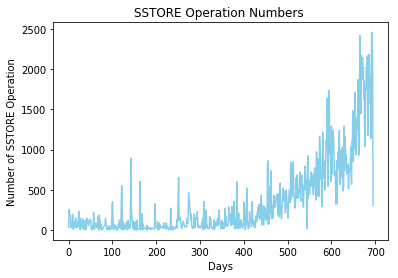

In [24]:
# Plot how many SSTORE operations per day
lists_sumST = sorted(sum_SST.items())
x, y = zip(*lists_sumST) # unpack a list of pairs into two tuples
plt.title('SSTORE Operation Numbers ')
plt.xlabel('Days')
plt.ylabel('Number of SSTORE Operation')
plt.plot(x, y,  color='skyblue')
plt.show()

In [25]:
# Caculate how many SLOAD operations per day
sum_SL = {}
for address in withDate_dict:
    time = withDate_dict[address][-1]
    numSload = withDate_dict[address][1]
    if time in sum_SL:
        sum_SL[time] += numSload
    else:
        sum_SL[time] = numSload

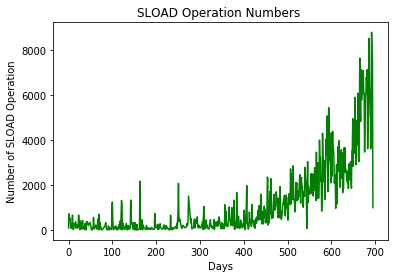

In [26]:
# Plot how many SLOAD operations per day
lists_sumSL = sorted(sum_SL.items())
x, y = zip(*lists_sumSL) # unpack a list of pairs into two tuples
plt.title('SLOAD Operation Numbers ')
plt.xlabel('Days')
plt.ylabel('Number of SLOAD Operation')
plt.plot(x, y,  color='green')
plt.show()

In [27]:
# Caculate how many BALANCE operations per day
sum_BA = {}
for address in withDate_dict:
    time = withDate_dict[address][-1]
    numBA = withDate_dict[address][2]
    if time in sum_BA:
        sum_BA[time] += numBA
    else:
        sum_BA[time] = numBA

In [43]:
sum_BA

{0: 1,
 1: 17,
 2: 2,
 3: 1,
 4: 3,
 5: 4,
 6: 10,
 7: 2,
 8: 0,
 9: 34,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 15: 2,
 16: 4,
 17: 0,
 18: 5,
 19: 2,
 20: 0,
 21: 4,
 22: 1,
 23: 9,
 25: 0,
 26: 1,
 27: 4,
 30: 8,
 31: 0,
 32: 3,
 33: 6,
 34: 4,
 35: 1,
 36: 0,
 38: 1,
 39: 0,
 40: 0,
 41: 3,
 42: 1,
 43: 1,
 45: 8,
 49: 8,
 50: 0,
 51: 3,
 52: 0,
 53: 3,
 54: 0,
 55: 0,
 56: 0,
 57: 8,
 58: 0,
 59: 2,
 61: 1,
 62: 1,
 63: 2,
 64: 3,
 65: 0,
 66: 0,
 67: 1,
 68: 1,
 69: 0,
 70: 25,
 71: 0,
 72: 2,
 73: 5,
 74: 3,
 75: 0,
 76: 0,
 77: 3,
 79: 2,
 83: 1,
 84: 14,
 85: 0,
 86: 2,
 87: 1,
 88: 0,
 90: 1,
 91: 0,
 92: 4,
 93: 0,
 94: 1,
 95: 0,
 97: 0,
 98: 0,
 99: 25,
 100: 41,
 101: 2,
 102: 0,
 103: 6,
 104: 3,
 105: 3,
 106: 0,
 107: 0,
 108: 2,
 110: 4,
 111: 0,
 112: 0,
 113: 1,
 114: 0,
 115: 0,
 116: 0,
 117: 0,
 118: 0,
 119: 0,
 121: 26,
 122: 21,
 123: 25,
 125: 1,
 126: 4,
 127: 12,
 128: 5,
 129: 1,
 132: 0,
 133: 0,
 134: 0,
 135: 2,
 136: 2,
 137: 1,
 138: 1,
 139: 5,
 140: 1,
 14

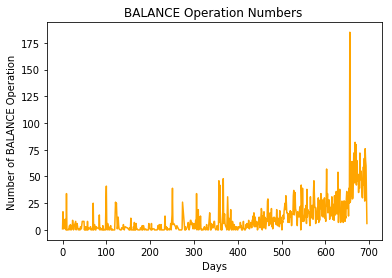

In [28]:
# Plot how many BALANCE operations per day
lists_sumBA = sorted(sum_BA.items())
x, y = zip(*lists_sumBA) # unpack a list of pairs into two tuples
plt.title('BALANCE Operation Numbers ')
plt.xlabel('Days')
plt.ylabel('Number of BALANCE Operation')
plt.plot(x, y,  color='orange')
plt.show()

In [29]:
# Caculate Average operations used perday
# Average SSTORE Operations
ave_SST ={x:float(sum_SST[x])/time2SST[x] for x in time2SST  }

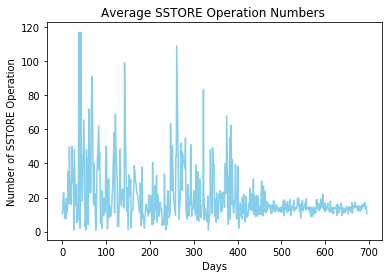

In [30]:
# Plot average SSTORE Operations
lists_aveSST= sorted(ave_SST.items())
x, y = zip(*lists_aveSST) # unpack a list of pairs into two tuples
plt.title('Average SSTORE Operation Numbers ')
plt.xlabel('Days')
plt.ylabel('Number of SSTORE Operation')
plt.plot(x, y,  color='skyblue')
plt.show()

In [31]:
# Average SLOAD Operations
ave_SL ={x:float(sum_SL[x])/time2SSL[x] for x in time2SSL  }

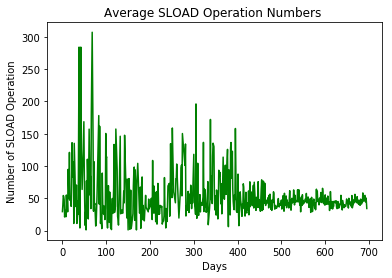

In [32]:
# Plot average SLOAD Operations
lists_aveSL= sorted(ave_SL.items())
x, y = zip(*lists_aveSL) # unpack a list of pairs into two tuples
plt.title('Average SLOAD Operation Numbers ')
plt.xlabel('Days')
plt.ylabel('Number of SLOAD Operation')
plt.plot(x, y,  color='green')
plt.show()

In [33]:
# Average BALANCE Operations
ave_BA ={x:float(sum_BA[x])/time2BA[x] for x in time2BA  }
max(ave_BA, key=ave_BA.get)

656

In [42]:
# Caculate how many Balance operations in that day sum_BA in 656 is 185
# time2BA is 8 

[]


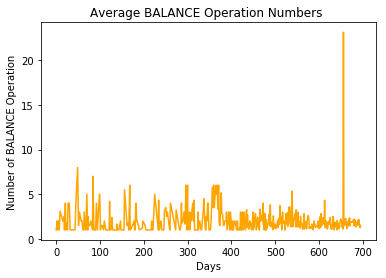

In [34]:
# Plot average SLOAD Operations
lists_aveBA= sorted(ave_BA.items())
x, y = zip(*lists_aveBA) # unpack a list of pairs into two tuples
plt.title('Average BALANCE Operation Numbers ')
plt.xlabel('Days')
plt.ylabel('Number of BALANCE Operation')
plt.plot(x, y,  color='orange')
plt.show()

In [35]:
# Caculate Percentage operations used perday
# Percentage SSTORE
percent_SST ={x:float(time2SST[x]/time2SCSD[x])*100 for x in time2SST}

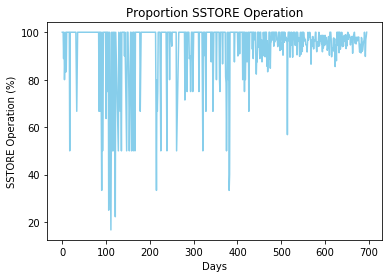

In [36]:
# Plot average SLOAD Operations
lists_perBA= sorted(percent_SST.items())
x, y = zip(*lists_perBA) # unpack a list of pairs into two tuples
plt.title('Proportion SSTORE Operation')
plt.xlabel('Days')
plt.ylabel('SSTORE Operation (%)')
plt.plot(x, y,  color='skyblue')
plt.show()

In [37]:
# Caculate Percentage operations used perday
# Percentage SLOAD
percent_SSL ={x:float(time2SSL[x]/time2SCSD[x])*100 for x in time2SSL}

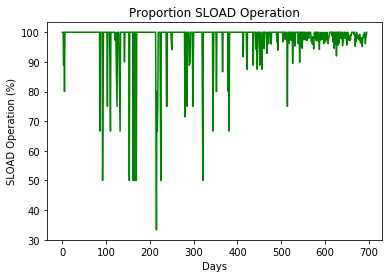

In [38]:
# Plot average SLOAD Operations
lists_perSL= sorted(percent_SSL.items())
x, y = zip(*lists_perSL) # unpack a list of pairs into two tuples
plt.title('Proportion SLOAD Operation')
plt.xlabel('Days')
plt.ylabel('SLOAD Operation (%)')
plt.plot(x, y,  color='green')
plt.show()

In [39]:
# Caculate Percentage operations used perday
# Percentage SLOAD
percent_BA ={x:float(time2BA[x]/time2SCSD[x])*100 for x in time2BA}

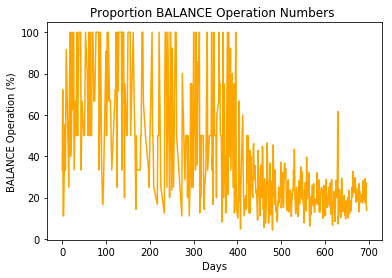

In [40]:
# Plot average SLOAD Operations
lists_perBA= sorted(percent_BA.items())
x, y = zip(*lists_perBA) # unpack a list of pairs into two tuples
plt.title('Proportion BALANCE Operation Numbers ')
plt.xlabel('Days')
plt.ylabel('BALANCE Operation (%)')
plt.plot(x, y,  color='orange')
plt.show()